# Importing Libraries:
The code imports pandas for data handling, nltk for natural language processing tasks, SentimentIntensityAnalyzer for sentiment analysis, LatentDirichletAllocation for topic modeling, TfidfVectorizer for vectorization, spacy for advanced text processing, and matplotlib for visualization.

In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
# import spacy
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

# Downloading NLTK Resources:
 These lines download the VADER lexicon and Punkt tokenizer for sentiment analysis and tokenization, respectively.

In [4]:
nltk.download('vader_lexicon')
nltk.download('punkt')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dhima\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhima\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Loading Data:
 The code reads data from a CSV file named 'input_data.csv' and stores it in the DataFrame 'dfs' for further analysis.

In [17]:
file = 'input_data.csv'
dfs = pd.read_csv(file)

product_sentiments = {}

# Functions

Detailed breakdown of the `analyze_product_sentiment` function:

- **Input**: `product_name` is the name of the product for which sentiment analysis will be performed.

- **Output**: The function performs sentiment analysis, topic modeling, and aspect sentiment analysis for the specified product.

1. **Finding Matching Products**:
   - The function first searches for products whose titles contain the input `product_name`, ignoring case sensitivity.
   - If no matching products are found, it prints a message indicating that no products match the input.
   - If only one matching product is found, sentiment analysis, topic modeling, and aspect sentiment analysis are performed for that product.
   - If multiple matching products are found, it lists them and asks the user to choose a specific product for analysis.

2. **Performing Sentiment Analysis**:
   - If a single product is found, sentiment analysis is performed using the `calculate_sentiment` function.
   - The reviews for the product are extracted from the DataFrame and converted into a list.
   - The `calculate_sentiment` function calculates sentiment scores for each review and provides an overall sentiment conclusion for the product.
  
3. **Topic Modeling and Aspect Sentiment Analysis**:
   - After sentiment analysis, the function calls `topic_modeling` to perform Latent Dirichlet Allocation (LDA) for topic modeling on the product reviews.
   - It also calls `aspect_sentiment_analysis` to analyze sentiment for different aspects extracted from the reviews using Named Entity Recognition (NER).

4. **Handling Multiple Matching Products**:
   - If multiple products match the input, the function allows the user to choose a specific product for analysis by entering the corresponding number.
   - It validates the user's input and performs sentiment analysis, topic modeling, and aspect sentiment analysis for the chosen product.

5. **Handling Invalid Input**:
   - If the user enters an invalid choice (not a number or out of range), the function prints an "Invalid choice" message.

The function encapsulates the entire process of analyzing sentiment, conducting topic modeling, and analyzing aspect sentiment for a given product, considering scenarios where multiple products match the input.



In [21]:
def analyze_product_sentiment(product_name):
    matching_products = dfs[dfs['productTitle'].str.lower().str.contains(product_name.lower())]['productTitle'].unique()

    if len(matching_products) == 0:
        print(f"No products found matching '{product_name}'.")
    elif len(matching_products) == 1:
        product_reviews = dfs[(dfs['productTitle'].str.lower() == matching_products[0].lower()) & (dfs['reviewDescription'].notnull())]['reviewDescription'].tolist()
        calculate_sentiment(matching_products[0], product_reviews)
        lda_output = topic_modeling(product_reviews)
        aspect_sentiments = aspect_sentiment_analysis(product_reviews)
    else:
        print("Multiple products found matching your input:")
        for idx, product in enumerate(matching_products, start=1):
            print(f"{idx}. {product}")
        choice = input("Enter the number of the specific product you want to analyze: ")
        if choice.isdigit() and int(choice) in range(1, len(matching_products) + 1):
            chosen_product = matching_products[int(choice) - 1]
            product_reviews = dfs[(dfs['productTitle'].str.lower() == chosen_product.lower()) & (dfs['reviewDescription'].notnull())]['reviewDescription'].tolist()
            calculate_sentiment(chosen_product, product_reviews)
            lda_output = topic_modeling(product_reviews)
        else:
            print("Invalid choice.")

# Function

Detailed breakdown of the `calculate_sentiment` function:

- **Input**: 
  - `product_name`: Name of the product for which sentiment analysis is being performed.
  - `product_reviews`: List of reviews for the specified product.

- **Output**: 
  - Calculates sentiment scores for each review.
  - Calculates the average sentiment score for the product.
  - Provides a conclusion based on the average sentiment score.

1. **Initializing SentimentIntensityAnalyzer**:
   - The function starts by creating an instance of `SentimentIntensityAnalyzer` from NLTK's VADER module.

2. **Sentiment Analysis for Product**:
   - It prints a header indicating that sentiment analysis is being performed for the specified product.
   - For each review in `product_reviews`, it tokenizes the review into words using NLTK's `word_tokenize` function.
   - It calculates sentiment scores (negative, neutral, positive, compound) using VADER for each review and prints these scores along with the review content.

3. **Calculating Average Sentiment Score**:
   - After analyzing all reviews, it calculates the average sentiment score for the product by taking the sum of compound scores and dividing it by the number of reviews.

4. **Assigning Sentiment Score to Product**:
   - It assigns the average sentiment score to the `product_sentiments` dictionary using `product_name` as the key.

5. **Conclusion Based on Sentiment Score**:
   - Based on the average sentiment score, the function determines a conclusion for the product:
     - If the average score is greater than or equal to 0.05, it recommends buying the product.
     - If the average score is less than or equal to -0.05, it advises against buying the product.
     - Otherwise, it suggests considering other factors before making a decision.

6. **Printing Results**:
   - The function prints the average sentiment score, along with the conclusion about whether to buy the product or not.

This function encapsulates the sentiment analysis process for a product, including calculating sentiment scores for reviews, computing an average sentiment score, and providing a recommendation based on the sentiment analysis results.

# Tokenization 

It is the process of separating a sequence of 
strings into individuals such as words, keywords, phrases, 
symbols and other elements known as tokens. Tokens can be 
individual words, phrases or even whole sentences. In the 
process of tokenization, some characters like punctuation marks 
are discarded. The tokens work as the input for different process 
like parsing and text mining. 

    tokens = word_tokenize(review)

    print(f"Tokens: {tokens}")

In [11]:
def calculate_sentiment(product_name, product_reviews):
    sid = SentimentIntensityAnalyzer()
    product_scores = []

    print(f"\nSentiment analysis for product '{product_name}':\n")

    for review in product_reviews:
        tokens = word_tokenize(review)
        print(f"Tokens: {tokens}")

        ss = sid.polarity_scores(review)
        print(f"Review: {review}")
        print(f"Negative Score: {ss['neg']:.4f}")
        print(f"Neutral Score: {ss['neu']:.4f}")
        print(f"Positive Score: {ss['pos']:.4f}")
        print(f"Compound Score: {ss['compound']:.4f}")
        print('-' * 111)

        product_scores.append(ss['compound'])

    avg_score = sum(product_scores) / len(product_scores)
    product_sentiments[product_name] = avg_score

    print(f"Average Sentiment Score: {avg_score:.4f}")

    if avg_score >= 0.05:
        comment = "It's recommended to buy this product."
    elif avg_score <= -0.05:
        comment = "It's not recommended to buy this product."
    else:
        comment = "You may consider buying this product based on other factors."

    print(f"Conclusion of Product: {comment}\n")

# Function
Detailed breakdown of the `display_reviews` function:

- **Input**: `reviews` is a list containing the reviews of a product.

- **Output**: The function prints the reviews in a formatted way with a border around each review.

1. **Displaying Reviews**:
   - The function starts by printing a header indicating that it will display the reviews of the product.
   - It then iterates through each review in the `reviews` list.
   - For each review, it prints a border consisting of plus symbols ('+') and hyphens ('-') to create a visual border around the review content.
   - The review content is printed in the center of the border using the `.format()` method with padding.
   - After printing all reviews, an empty line is printed for readability.

The purpose of this function is to neatly display the reviews of a product, making it easier for the user to read and analyze the content. The use of borders adds a visual separation between reviews, enhancing the overall presentation of the information.

In [12]:
def display_reviews(reviews):
    print("Here are some of the reviews of the product you searched for:\n")
    for review in reviews:
        print("+" + "-" * 78 + "+")  # Border
        print("| {:^76} |".format(review))  # Review content
        print("+" + "-" * 78 + "+")  # Border
    print("\n")


# Topic Modeling

Topic modeling, specifically using techniques like Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF), is a method used in natural language processing and machine learning to discover topics or themes within a collection of documents. In the context of analyzing reviews, topic modeling can help identify the main topics or subjects that are being discussed across different reviews.

The main purpose of topic modeling is to automatically discover hidden themes or topics within a collection of documents, such as text data. This process aids in understanding the underlying structure of the data and can provide valuable insights into the content without the need for manual annotation or labeling of topics

The output of topic modeling, such as LDA or NMF, indeed consists of probability distributions for topics within documents or across a corpus. These probabilities represent the likelihood or strength of each topic's presence in a given document. While these probabilities themselves don't directly provide text summarization, they serve as foundational data for generating summaries or understanding the main themes within the text.



**Identifying Dominant Topics - By analyzing the topic probabilities for each document, you can identify the dominant topics or themes that are most prevalent in the text. This information helps in understanding the primary focus of the document or the corpus.**

Detailed explanation of the `topic_modeling` function:

- **Input**: 
  - `reviews`: List of reviews for which topic modeling will be performed.

- **Output**: 
  - `lda_output`: Result of Latent Dirichlet Allocation (LDA) topic modeling.

1. **Initializing TF-IDF Vectorizer**:
   - The function starts by creating a TF-IDF vectorizer using `TfidfVectorizer` from Scikit-learn.
   - Parameters such as `max_df`, `min_df`, and `stop_words` are set to control the vectorization process.

2. **Creating TF-IDF Matrix**:
   - It transforms the input reviews into a TF-IDF matrix using the `fit_transform` method of the TF-IDF vectorizer.

3. **Initializing LDA Model**:
   - The function initializes an LDA model using `LatentDirichletAllocation` from Scikit-learn.
   - Parameters like `n_components` (number of topics) and `random_state` are set to configure the LDA model.

4. **Fitting LDA Model**:
   - It fits the LDA model to the TF-IDF matrix obtained from the reviews using the `fit_transform` method.

5. **Returning LDA Output**:
   - The function returns the output of LDA topic modeling, which contains the topic distribution for each document (review) in the input.

This function performs topic modeling on a set of reviews using LDA, which helps in discovering latent topics within the reviews and their corresponding distributions. The result (`lda_output`) can be further analyzed to understand the topics present in the reviews and their relevance to the product or domain.

# Latent Dirichlet Allocation (LDA)

Latent Dirichlet allocation is one of the most popular methods for performing topic modeling. Each document consists of various words and each topic can be associated with some words. The aim behind the LDA to find topics that the document belongs to, on the basis of words contains in it. It assumes that documents with similar topics will use a similar group of words. This enables the documents to map the probability distribution over latent topics and topics are probability distribution.

`lda_model = LatentDirichletAllocation(n_components=5, random_state=42)`, the `LatentDirichletAllocation` is a topic modeling technique, and here's what each part of this code means:

- `LatentDirichletAllocation`: This is a topic modeling technique used to discover abstract topics within a collection of documents. It assumes that each document is a mixture of topics, and each topic is a mixture of words. Latent Dirichlet Allocation (LDA) models the distribution of topics in documents and the distribution of words in topics.

- `n_components=5`: This parameter specifies the number of topics that the LDA model should identify in the documents. In this case, `n_components=5` means that the model will attempt to identify 5 distinct topics within the corpus of documents. You can adjust this parameter based on your specific analysis requirements and the complexity of topics you expect in the data.

- `random_state=42`: This parameter is used to set the random seed for reproducibility. By setting `random_state` to a specific value (e.g., `42`), you ensure that the results of the LDA model remain consistent across different runs. This is important for reproducibility and comparability of results.

Here's a brief overview of how LDA works:

1. **Input Data**: LDA takes a corpus of text data as input, where each document is represented as a bag of words (a collection of words without considering their order).

2. **TF-IDF Transformation**: Before applying LDA, the text data is often transformed into a numerical format using techniques like TF-IDF (Term Frequency-Inverse Document Frequency) to represent the importance of words in documents.

3. **Topic Modeling with LDA**: The LDA algorithm then processes the TF-IDF matrix and tries to learn the underlying topics by iteratively assigning words to topics and topics to documents based on statistical inference.

4. **Topic Interpretation**: After training, the LDA model provides a set of topics along with the most probable words associated with each topic. These topics can be interpreted to understand the main themes or subjects present in the text data.

`LatentDirichletAllocation` is a powerful tool for unsupervised learning of topics from text data and can be used in various applications such as content analysis, information retrieval, and recommendation systems. Adjusting parameters like `n_components` allows you to control the granularity and complexity of topics extracted by the model.

# What is TF-IDF Vectorizer

1. **TF-IDF Vectorizer Initialization**:
   - `TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')`: This line initializes a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer object. TF-IDF is a technique used in natural language processing to quantify the importance of a term in a document relative to a collection of documents. Here are the parameters used:
     - `max_df=0.95`: This parameter specifies that a term (word) will be ignored if it appears in more than 95% of the documents. In other words, very common words across documents are often not very informative for distinguishing topics or themes.
     - `min_df=2`: This parameter specifies that a term must appear in at least 2 documents to be considered. This helps filter out very rare terms that may not contribute significantly to the analysis.
     - `stop_words='english'`: This parameter tells the vectorizer to ignore common English stop words like "the," "is," "and," etc., as they are often not useful for analysis and can be ignored.

2. **Transforming Reviews into TF-IDF Matrix**:
   - `tfidf = tfidf_vectorizer.fit_transform(reviews)`: This line takes a list of reviews (text data) and transforms them into a TF-IDF matrix. Each row of the matrix corresponds to a document (review), and each column corresponds to a unique term (word) in the corpus of reviews. The values in the matrix represent the TF-IDF scores for each term in each document, capturing the importance of each term in each document relative to the entire corpus.

In summary, the TF-IDF vectorizer is a preprocessing step that converts text data into a numerical format (TF-IDF matrix) that can be used as input for various text analysis techniques, such as topic modeling, sentiment analysis, or classification. It helps in capturing the importance of terms while accounting for their frequency and distribution across documents in the corpus.

In [24]:
def topic_modeling(reviews):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(reviews)

    lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
    lda_output = lda_model.fit_transform(tfidf)

    return lda_output

# Function

Detailed explanation of the `plot_all_products_sentiments` function:

- **Purpose**: 
  - This function is responsible for visualizing the sentiment scores of all products using a scatter plot.

- **Steps**:

1. **Calculating Total Number of Products**:
   - It calculates the total number of unique products stored in the `product_sentiments` dictionary.

2. **Setting Up the Plot**:
   - The function creates a new figure with a specified size (10x6) using `plt.figure(figsize=(10, 6))`.

3. **Creating the Scatter Plot**:
   - It generates a scatter plot using `plt.scatter` with the sentiment scores as the y-axis values.
   - The x-axis values are set to the range of the number of products (0, 1, 2, ..., n) using `range(len(product_sentiments))`.
   - The colors of the points are determined based on the sentiment scores using `c=list(product_sentiments.values())` and a colormap ('coolwarm').

4. **Adding Labels and Title**:
   - It sets the y-axis label as 'Sentiment Score' using `plt.ylabel('Sentiment Score')`.
   - It sets the title of the plot as 'Sentiment Analysis of Products' using `plt.title('Sentiment Analysis of Products')`.

5. **Colorbar**:
   - It adds a colorbar to the plot to show the mapping between sentiment scores and colors using `plt.colorbar(label='Sentiment Score')`.

6. **Grid and Layout**:
   - It adds a grid to the plot for better readability using `plt.grid(True)`.
   - It adjusts the layout of the plot using `plt.tight_layout()` to prevent overlapping elements.

7. **Displaying the Plot**:
   - Finally, it displays the plot using `plt.show()`.

This function is useful for visually analyzing the sentiment distribution of products, where each product is represented as a point on the scatter plot with its sentiment score on the y-axis. The color of each point indicates the sentiment level, providing a quick overview of product sentiments.

In [14]:
def plot_all_products_sentiments():
    total_products = len(product_sentiments)
    print(f"Total number of Unique products: {total_products}")

    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(product_sentiments)), list(product_sentiments.values()), c=list(product_sentiments.values()), cmap='coolwarm')
    plt.xlabel('')  # Empty x-label
    plt.ylabel('Sentiment Score')
    plt.title('Sentiment Analysis of Products')
    plt.colorbar(label='Sentiment Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Function

Detailed explanation of the `analyze_all_products_sentiment` function:

- **Purpose**:
  - This function analyzes the sentiment of all unique products in the dataset.
  - It calculates the average sentiment score for each product based on its reviews.

- **Steps**:

1. **Initializing SentimentIntensityAnalyzer**:
   - It creates an instance of `SentimentIntensityAnalyzer` from NLTK's VADER module to perform sentiment analysis.

2. **Looping Through Unique Products**:
   - The function iterates through each unique product name in the 'productTitle' column of the DataFrame (`dfs`).
   - It retrieves the reviews for each product that are not null using DataFrame filtering.

3. **Calculating Sentiment Scores**:
   - For each product, it calculates sentiment scores for its reviews using VADER.
   - The sentiment scores (compound scores) for each review are averaged to obtain the average sentiment score for the product.

4. **Storing Sentiment Scores**:
   - The average sentiment score for each product is stored in the `product_sentiments` dictionary, with the product name as the key.

This function provides a comprehensive analysis of the sentiment for all products in the dataset, allowing you to understand the overall sentiment distribution across different products based on customer reviews.

In [15]:
def analyze_all_products_sentiment():
    sid = SentimentIntensityAnalyzer()

    for product_name in dfs['productTitle'].unique():
        product_reviews = dfs[(dfs['productTitle'] == product_name) & (dfs['reviewDescription'].notnull())]['reviewDescription'].tolist()

        if product_reviews:
            product_scores = []

            for review in product_reviews:
                ss = sid.polarity_scores(review)
                product_scores.append(ss['compound'])

            avg_score = sum(product_scores) / len(product_scores)
            product_sentiments[product_name] = avg_score


# User input for Product name


Enter the product name for which you want reviews: apple
Multiple products found matching your input:
1. APPLE iPhone SE (Black, 256 GB)
2. Apple iPhone XR (Blue, 64 GB) (Includes EarPods, Power Adapter)
3. APPLE iPad (6th Gen) 32 GB ROM 9.7 inch with Wi-Fi+4G (Gold)
4. Himalayan Natives Apple Cider Vinegar
5. Apple iPhone XR (Yellow, 128 GB) (Includes EarPods, Power Adapter)
6. Apple iPhone XR (Yellow, 256 GB) (Includes EarPods, Power Adapter)
7. APPLE MD827ZM/B Wired Headset
8. Quick Shel 3D- CUTE CARTOON PINEAPPLE FOLDING STORAGE ORGANIZER CUM STOOL WITH INNER INFLATABLE STOOL PLUS AIR FILLED SOFT COMFORT SEAT WITH PUMP Living & Bedroom Stool
9. APPLE iPhone 6s Plus (Rose Gold, 64 GB)
10. Apple iPhone XR (Black, 128 GB) (Includes EarPods, Power Adapter)
11. APPLE iPad (6th Gen) 32 GB ROM 9.7 inch with Wi-Fi+4G (Space Grey)
12. APPLE iPhone 12 (Blue, 128 GB)
Enter the number of the specific product you want to analyze: 1

Sentiment analysis for product 'APPLE iPhone SE (Black, 256 GB

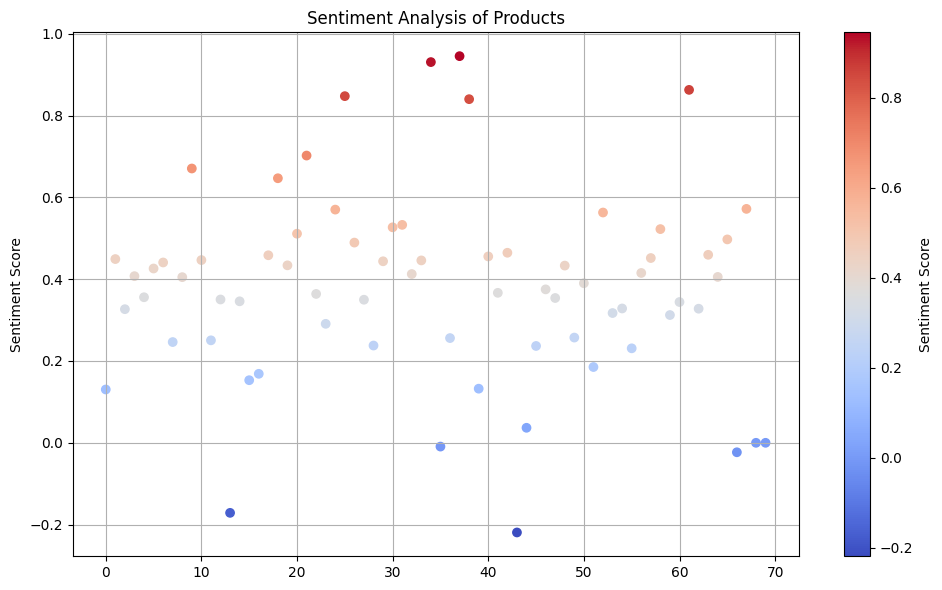

In [22]:
product_name = input("Enter the product name for which you want reviews: ")

analyze_product_sentiment(product_name)

analyze_all_products_sentiment()

#Reviews are extracted for the product that matches the user's input using DataFrame filtering

matching_products = dfs[dfs['productTitle'].str.lower().str.contains(product_name.lower())]['productTitle'].unique()
product_reviews = dfs[(dfs['productTitle'].str.lower() == matching_products[0].lower()) & (dfs['reviewDescription'].notnull())]['reviewDescription'].tolist()

# Call topic modeling and aspect sentiment analysis
lda_output = topic_modeling(product_reviews)

print("Topic Modeling Results:")
print(lda_output)


plot_all_products_sentiments()

# Description of Topic Modeling

In the output you provided, the "Topic Modeling Results" section shows a matrix-like structure with numbers. Each row in this matrix corresponds to a review or document, and each column represents a topic. The numbers in the matrix indicate the probability or contribution of each topic to a particular document.

Let's break down what each part of the output means:

- **Topic Modeling Results**:
  - Each row corresponds to a review or document analyzed by the topic modeling algorithm.
  - Each column represents a topic identified by the topic modeling algorithm.
  - The numbers in the matrix represent the probability or weight of each topic in a specific document.

For example, taking the first row in your output:
```
[0.10001589 0.59976319 0.10001913 0.10002198 0.10017981]
```
This means that the first document (review) is likely associated with different topics based on the probabilities assigned by the topic modeling algorithm. The numbers suggest the following:
- Topic 2 has the highest probability (approximately 0.60) for this document.
- Topics 1, 3, 4, and 5 have lower probabilities (around 0.10 each) compared to Topic 2.

In topic modeling, these probabilities help in understanding which topics are prevalent or influential in each document. The higher the probability for a topic in a document, the more significant that topic is considered to be in the context of that document.